In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("./utils")

In [2]:
import loader
import round_classifier
import thresholds
from Parser import Parser

In [3]:
all_data = loader.load_dataset()

In [4]:
all_columns = all_data.columns
all_columns[0:16]

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive'],
      dtype='object')

In [5]:
parser = Parser()
treat_data = parser.classify_weapons(all_data.copy())
treat_data = parser.create_round_winner_columns(treat_data.copy())

In [6]:
treat_data["pistol_round"] = treat_data.apply(
    round_classifier.define_pistol_round, axis=1
)

# Defining eco rounds
treat_data["ct_eco"] = treat_data.apply(round_classifier.define_full_ct_eco, axis=1)
treat_data["t_eco"] = treat_data.apply(round_classifier.define_full_t_eco, axis=1)

# Defining force buy rounds
treat_data["ct_force"] = treat_data.apply(
    round_classifier.define_force_ct_round, axis=1
)
treat_data["t_force"] = treat_data.apply(round_classifier.define_force_t_round, axis=1)

In [7]:
# Não acho que são as colunas certas pra analisar, mas só um exemplo do que podemos fazer

n_bins = 7
lower, higher = thresholds.prepare(treat_data.copy(), "ct_health")
treat_data["ct_health_thresholds"] = thresholds.build(
    treat_data.copy(), "ct_health", lower, higher, n_bins
)
treat_data["ct_health_thresholds_num"] = thresholds.build_numerical(
    treat_data.copy(), "ct_health", lower, higher, n_bins
)

In [8]:
# Não acho que são as colunas certas pra analisar, mas só um exemplo do que podemos fazer

n_bins = 7
lower, higher = thresholds.prepare(treat_data.copy(), "t_health")
treat_data["t_health_thresholds"] = thresholds.build(
    treat_data.copy(), "t_health", lower, higher, n_bins
)
treat_data["t_health_thresholds_num"] = thresholds.build_numerical(
    treat_data.copy(), "t_health", lower, higher, n_bins
)

In [9]:
# Selecting columns
normal_columns = all_columns[0:16].tolist()
made_columns_t = [
    "t_main_rifle",
    "t_sec_rifle",
    "t_force_weapons",
    "t_weak_pistols",
    "t_strong_pistols",
    "t_granades",
    "t_weapon_awp",
    "t_eco",
    "t_force",
]
made_columns_ct = [
    "ct_main_rifle",
    "ct_sec_rifle",
    "ct_force_weapons",
    "ct_weak_pistols",
    "ct_strong_pistols",
    "ct_granades",
    "ct_weapon_awp",
    "ct_eco",
    "ct_force",
]
extra_columns = [
    "pistol_round",
    "round_winner",
    "round_winner_t",
    "round_winner_ct",
    "t_health_thresholds",
    "t_health_thresholds_num",
    "ct_health_thresholds",
    "ct_health_thresholds_num",
]
selected_columns = normal_columns + made_columns_ct + made_columns_t + extra_columns

# Getting only columns selected columns
final_df = treat_data[selected_columns]

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   time_left                 122410 non-null  float64 
 1   ct_score                  122410 non-null  float64 
 2   t_score                   122410 non-null  float64 
 3   map                       122410 non-null  object  
 4   bomb_planted              122410 non-null  bool    
 5   ct_health                 122410 non-null  float64 
 6   t_health                  122410 non-null  float64 
 7   ct_armor                  122410 non-null  float64 
 8   t_armor                   122410 non-null  float64 
 9   ct_money                  122410 non-null  float64 
 10  t_money                   122410 non-null  float64 
 11  ct_helmets                122410 non-null  float64 
 12  t_helmets                 122410 non-null  float64 
 13  ct_defuse_kits            122

In [11]:
# checando nans
final_df.isna().sum()

time_left                   0
ct_score                    0
t_score                     0
map                         0
bomb_planted                0
ct_health                   0
t_health                    0
ct_armor                    0
t_armor                     0
ct_money                    0
t_money                     0
ct_helmets                  0
t_helmets                   0
ct_defuse_kits              0
ct_players_alive            0
t_players_alive             0
ct_main_rifle               0
ct_sec_rifle                0
ct_force_weapons            0
ct_weak_pistols             0
ct_strong_pistols           0
ct_granades                 0
ct_weapon_awp               0
ct_eco                      0
ct_force                    0
t_main_rifle                0
t_sec_rifle                 0
t_force_weapons             0
t_weak_pistols              0
t_strong_pistols            0
t_granades                  0
t_weapon_awp                0
t_eco                       0
t_force   

In [14]:
# Selecting columns
normal_columns = all_columns[0:16].tolist()
made_columns_t = [
    "t_granades",
    "t_eco",
    "t_force",
]
made_columns_ct = [
    "ct_granades",
    "ct_eco",
    "ct_force",
]
extra_columns = [
    "pistol_round",
    "round_winner",
    "round_winner_t",
    "round_winner_ct",
]
selected_columns = normal_columns + made_columns_ct + made_columns_t + extra_columns

# Getting only columns selected columns
corr_df = treat_data[selected_columns]

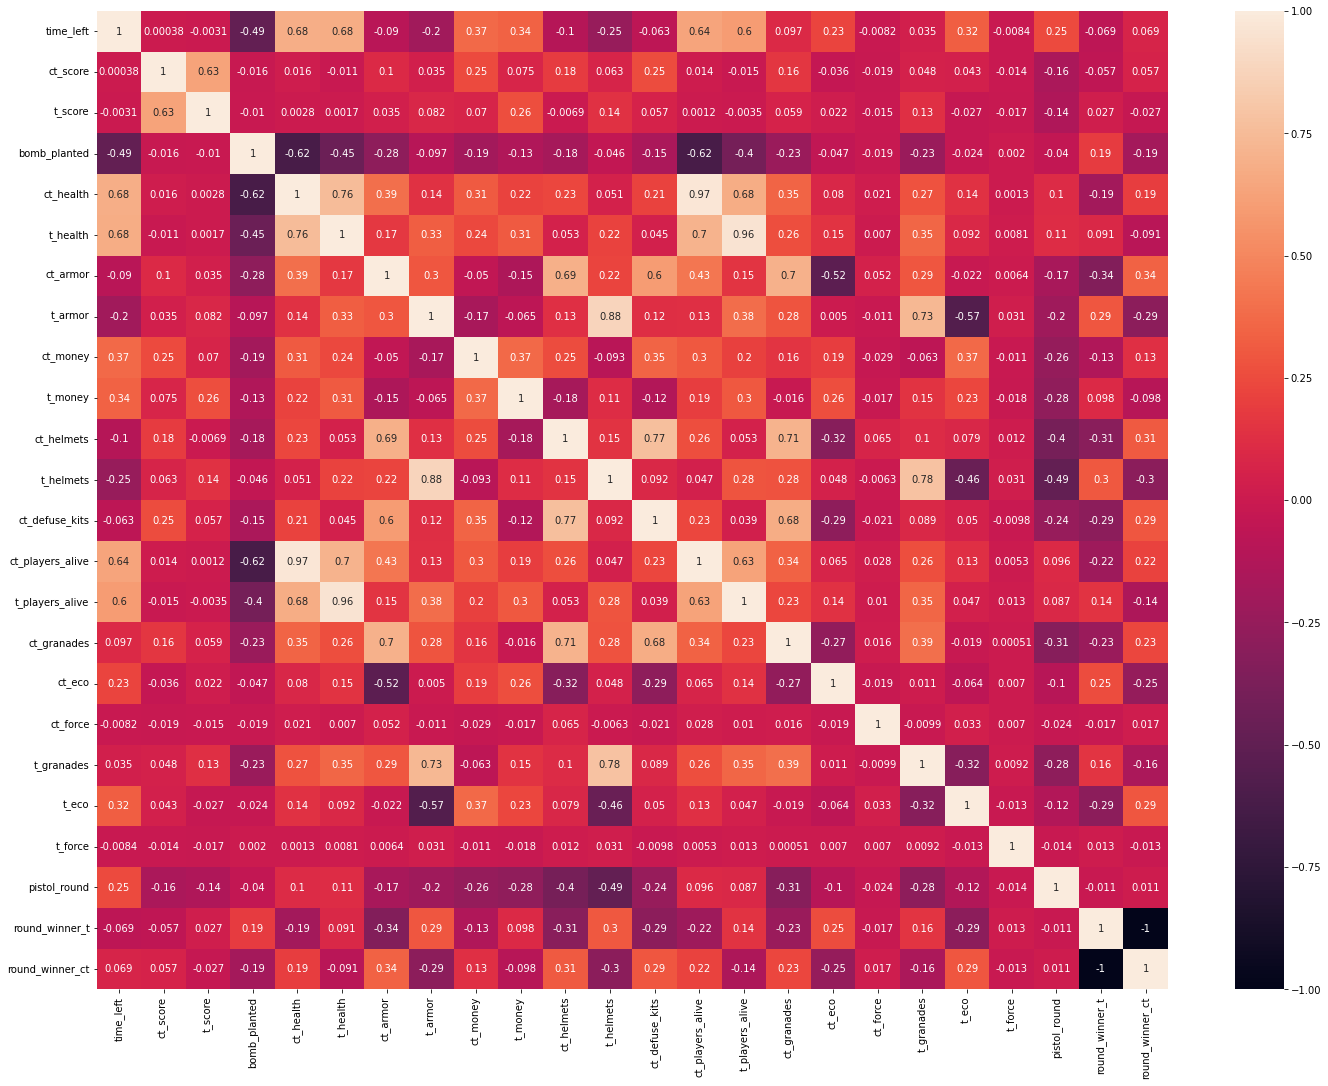

In [17]:
# Visualizando as correlações
plt.subplots(figsize=(24, 18))
sns.heatmap(corr_df.corr(), annot=True)
plt.show()

In [48]:
final_df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_eco,t_force,pistol_round,round_winner,round_winner_t,round_winner_ct,t_health_thresholds,t_health_thresholds_num,ct_health_thresholds,ct_health_thresholds_num
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0,0,1,CT,0,1,"(425, 510)",5,"(426, 497)",6
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0,0,1,CT,0,1,"(425, 510)",5,"(426, 497)",6
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0,0,1,CT,0,1,"(340, 425)",4,"(355, 426)",5
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0,0,1,CT,0,1,"(340, 425)",4,"(355, 426)",5
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,1,0,0,CT,0,1,"(425, 510)",5,"(426, 497)",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,0,0,0,T,1,0,"(170, 255)",2,"(142, 213)",2
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,0,0,0,T,1,0,"(425, 510)",5,"(426, 497)",6
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,0,0,0,T,1,0,"(425, 510)",5,"(426, 497)",6
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,0,0,0,T,1,0,"(425, 510)",5,"(426, 497)",6


In [63]:
score_per_map  = final_df[final_df['map'] != "de_cache"].groupby(by='map').sum()[['round_winner_ct','round_winner_t']]
score_per_map["Contra Terrorista"] = 100*score_per_map['round_winner_ct']/(score_per_map['round_winner_ct']+score_per_map['round_winner_t'])
score_per_map["Terrorista"] = 100*score_per_map['round_winner_t']/(score_per_map['round_winner_ct']+score_per_map['round_winner_t'])
score_per_map['win_diff'] = score_per_map['Terrorista'] - score_per_map['Contra Terrorista']
score_per_map

,round_winner_ct,round_winner_t,Contra Terrorista,Terrorista,win_diff
map,,,,,
de_dust2,10158,11986,45.872471,54.127529,8.255058
de_inferno,10810,13001,45.399185,54.600815,9.201629
de_mirage,9144,9432,49.224806,50.775194,1.550388
de_nuke,10214,8811,53.687254,46.312746,-7.374507
de_overpass,7026,7055,49.897024,50.102976,0.205951
de_train,7310,6181,54.184271,45.815729,-8.368542
de_vertigo,5239,5898,47.041394,52.958606,5.917213


In [64]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(score_per_map, x=score_per_map.index,
                 labels={
                     "value": "Rounds ganhos(%)",
                     "map": "Mapa",
                     'variable':'Lado',

                 },
                  y=["Contra Terrorista","Terrorista"],barmode="group")
fig.show()